# Birmingham Purchase Cards Transactions <a class='tocSkip'>
-----
## Pablo Javier Vidal



## Import Libraries

In [78]:
import os   # manage some tasks related with OS 
import pandas as pd   # pandas library to manage data in datafame stuctue
import seaborn as sns; sns.set_theme(color_codes=True)   # a nice library for plot data
import numpy as np    # library to manage math calculus and  1d and 2d numeric structure
from zipfile import ZipFile  # library used just in case
import matplotlib.pyplot as plt # library to plot

# Warning configuration
import warnings
warnings.filterwarnings('ignore')

## Work Paths

Here you can define the access paths to the data and where they will be saved once all the files are joined.

In [79]:
working_path = 'D:/DATA SCIENCE/Tech test Fraud/dataset'   # main path for data
name_zip_file = 'dataset.zip'   # main name of the zip dataset
output_unified_data = "D:/DATA SCIENCE/Tech test Fraud/dataset/unified"   # main path for store the data merged
file_name_output = "/cleaned_data.csv"   # name of the file that contains the data merged

### Download the data and verify the column names in each dataset.

In [80]:
###  The zip file contain data between 2014 and 2019, in dataset folder exists some files to test all the files. 
###  If you need evaluate all the data,  uncomment the lines below 

#zf = ZipFile(working_path+"/"+name_zip_file, 'r')
#zf.extractall(working_path)
#zf.close()
#archives = [file for file in os.listdir(path) if extension in file]

For this initial analysis I'll take into account a window for Purchase Card Transactios from January 2017 to April 2017. This windows is taked in order 
Is important to take into account that there are some months missing.

This data range is taken basically as an evaluation of the entire pipeline and for the time that some processing takes (around 10 minutes in some cases).

In [81]:
#check if the path exists
def create_ouput_path(path):
    if not os.path.exists(path):
        os.makedirs(path)

The function **number_of_columns()** allows unify the naming convention in all split data sets.
* For example: I find two different name variable variations for the same column data in different datasets ("Directorate" and "Directorates"). Also, I check that exists "Directorate" and "Diretorate " title with an exta space.
* Then I could unify the data structure before unifying all the split data in a unique data set. 
* Additionally, as result,  the function calculates the cross columns of the entire data set.

In [82]:


def number_of_columns(path, extension='.xls' ):
    archives = [file for file in os.listdir(path) if extension in file]
    total_columns = []
    print("-----------------------------")
    print("Number of Columns")
    print("-----------------------------")
    for archive in archives:
        table = os.path.splitext(archive)[0]
        df = pd.read_excel(path + "/" + archive)
        columns = df.columns.to_list()

        print("The number of columns of the the table "+ str(table) + " are : " + str(len(columns)))
        total_columns.append(set(columns))
    print("-----------------------------")
    print("COLUMNS")
    print("-----------------------------")
    for i in range(len(total_columns) - 1):
        table = os.path.splitext(archives[i])[0]
        print("The columns of the table "+ str(table) + " are: ")
        print(total_columns[i])
    intersec_columns = total_columns[0]   
    for i in range(len(total_columns) - 1):
        print("--------------------------------------------------------------------")
        print("Intersection = ",intersec_columns)
        print("Base data = ",total_columns[i])

        intersec_columns = intersec_columns.intersection(total_columns[i])

        print("Result = ",intersec_columns)
    print("--------------------------------------")
    print("--  mutual columns in all archives  --")
    print("--------------------------------------")
    print(intersec_columns)
    return intersec_columns

In [83]:
cross_columns = number_of_columns(working_path)

-----------------------------
Number of Columns
-----------------------------


The number of columns of the the table 2018-07 are : 16
The number of columns of the the table 2018-08 are : 16
The number of columns of the the table 2018-09 are : 16
The number of columns of the the table 2018-10 are : 16
The number of columns of the the table 2018-11 are : 16
The number of columns of the the table 2018-12 are : 16
-----------------------------
COLUMNS
-----------------------------
The columns of the table 2018-07 are: 
{'BILLING CUR CODE', 'ORIGINAL GROSS AMT', 'MERCHANT NAME', 'DIRECTORATE', 'TRANS CAC CODE 3', 'CARD NUMBER', 'TRANS CAC DESC 2', 'TRANS CAC CODE 2', 'TRANS CAC CODE 1', 'TRANS TAX RATE', 'ORIGINAL CUR', 'TRANS TAX AMT', 'TRANS CAC DESC 1', 'TRANS DATE', 'BILLING GROSS AMT', 'TRANS VAT DESC'}
The columns of the table 2018-08 are: 
{'BILLING CUR CODE', 'ORIGINAL GROSS AMT', 'MERCHANT NAME', 'DIRECTORATE', 'TRANS CAC CODE 3', 'CARD NUMBER', 'TRANS CAC DESC 2', 'TRANS CAC CODE 2', 'TRANS CAC CODE 1', 'TRANS TAX RATE', 'ORIGINAL CUR', 'TRANS TAX AMT', 'TR

In [84]:
### check if the files exist in the path.

file_paths_list = [file for file in os.listdir(working_path) if '.xls' in file]
file_paths_list

['2018-07.xls',
 '2018-08.xls',
 '2018-09.xls',
 '2018-10.xls',
 '2018-11.xls',
 '2018-12.xls']

### Unification of all xls files in a single dataset

In [85]:
### Function to join all the data vertically in order to create a new dataframe and return it

def unification_data(input_path, cross_columns):
    # list all the files
    archives = [file for file in os.listdir(input_path) if '.xls' in file]
    splited_data = []
    # Loop through the files and concatenate them based on matching columns
    for archive in archives:
    
        table = os.path.splitext(archive)[0]
        df = pd.read_excel(input_path + "/" + archive,usecols=cross_columns)
        splited_data.append(df)
        print("The volume information for the table " + str(table) + " is: " + str(df.shape[0]))
    unified_data_df = pd.DataFrame()
    total_row_number = 0
    for data in splited_data:
        unified_data_df = pd.concat([unified_data_df, data])
        volume_data = data.shape[0]
        total_row_number = total_row_number + volume_data
    print("The total of registers in the data must be " + str(total_row_number))
    print("The total of registers in the unified data is: " + str(unified_data_df.shape[0]))
   
    return unified_data_df   


In [86]:
# Join files
unified_df = unification_data(working_path, cross_columns)

The volume information for the table 2018-07 is: 4097
The volume information for the table 2018-08 is: 1405
The volume information for the table 2018-09 is: 4460
The volume information for the table 2018-10 is: 3799
The volume information for the table 2018-11 is: 4098
The volume information for the table 2018-12 is: 2936
The total of registers in the data must be 20795
The total of registers in the unified data is: 20795


In [87]:
unified_df.head(3)

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,TRANS TAX RATE,TRANS TAX AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,DIRECTORATE
0,2018-08-02,VR,68.0,GBP,68.0,GBP,20.0,11.33,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
1,2018-07-26,VR,68.0,GBP,68.0,GBP,20.0,11.33,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health
2,2018-07-20,VR,60.0,GBP,60.0,GBP,20.0,10.00,mrh six ways,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health


In [88]:
## Now I'll take a look at some statistical features
df_filas,df_columnas = unified_df.shape[0], unified_df.shape[1]
print(f'Amount of Rows:{df_filas}, Amount of Columns: {df_columnas}')

Amount of Rows:20795, Amount of Columns: 16


Now, I check the null values in the entire dataset/. Then I will check the more important columns in order to evaluate what action take with these values

In [89]:
#check general null values
unified_df.isnull().sum()

TRANS DATE              0
TRANS VAT DESC        412
ORIGINAL GROSS AMT      0
ORIGINAL CUR            0
BILLING GROSS AMT       0
BILLING CUR CODE        0
TRANS TAX RATE          0
TRANS TAX AMT           0
MERCHANT NAME           0
CARD NUMBER             0
TRANS CAC CODE 1       18
TRANS CAC DESC 1       18
TRANS CAC CODE 2       28
TRANS CAC DESC 2       28
TRANS CAC CODE 3       29
DIRECTORATE             0
dtype: int64

In [90]:
unified_df["TRANS DATE"].isna().sum()

0

In [91]:
unified_df["ORIGINAL GROSS AMT"].isna().sum()

0

In [92]:
### Function to compute the % of missing data for each columns

def missing_values_table(df_adf_append):
    # Total missing values
    mis_val = df_adf_append.isnull().sum()
    
    # % missing values
    mis_val_percent = 100 * df_adf_append.isnull().sum() / len(df_adf_append)
    
    # Table for present results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing ', 1 : '% of Total Values'})
    
    # Sort missing values from highest to lowest
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    
    # Print resume
    print ("Dataframe has " + str(df_adf_append.shape[1]) + " columnas.\n"      
        "of which " + str(mis_val_table_ren_columns.shape[0]) +
            " have missing values.")
    
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [93]:
missing_values = missing_values_table(unified_df)
missing_values


Dataframe has 16 columnas.
of which 6 have missing values.


,Missing,% of Total Values
TRANS VAT DESC,412,2.0
TRANS CAC CODE 3,29,0.1
TRANS CAC CODE 2,28,0.1
TRANS CAC DESC 2,28,0.1
TRANS CAC CODE 1,18,0.1
TRANS CAC DESC 1,18,0.1


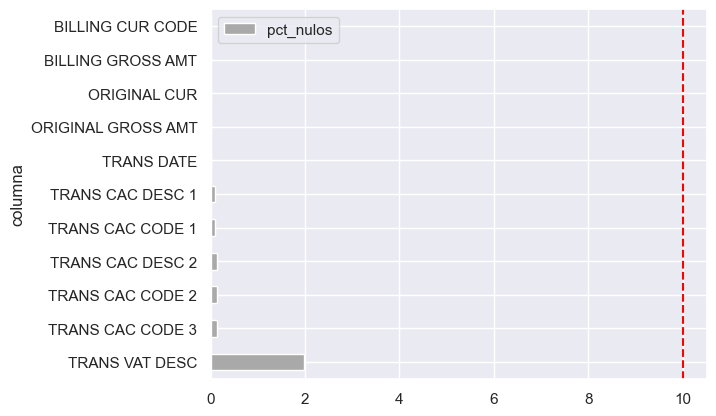

In [94]:
#### PLOT for  represent the number of nulls in each of the columns, and % against the total number of records

umbral_nan = 10

df_nan = pd.DataFrame(unified_df.isnull().sum()).reset_index(level=0)
df_nan.rename(columns={"index": "columna", 0: "num_nulos"}, inplace=True)
df_nan['pct_nulos'] = (df_nan['num_nulos']/df_filas)*100

df_nan.sort_values(by=['pct_nulos'], ascending=False).iloc[0:11,:].plot.barh(x='columna', 
                                                                             y='pct_nulos', color='darkgray')

plt.axvline(umbral_nan, color='red', linestyle='--');

There is only 2% of the data that are null values which is good. The red line indicates a limit which can be modified to evaluate the number of maximum null values that can be admitted. This allows you to define a rule or dimension to make the decision to modify or delete that data.

In [95]:
print(f"Total null data in the entire dataframe: {unified_df.isnull().sum(axis=1).sum(axis=0)}")

Total null data in the entire dataframe: 533


Null values should not be imputed in the column called "ORIGINAL GROSS AMT", and bearing in mind that there is no a significant number of null records, we proceed to change those.

In [96]:
# Imputes null data from numerical columns, replacing them with the median
 
for indice, fila in pd.DataFrame(unified_df.dtypes).iterrows():
    columna = indice
    tipo_col = fila[0]
    cant_nulos_col = unified_df[columna].isnull().sum()
    
    # If it is numerical, replace it with the median
    if (tipo_col =="int64") | (tipo_col == "float64"):
        if (cant_nulos_col>0):
            mediana = unified_df[columna].median()
            unified_df[columna].fillna(mediana, inplace=True)
            print(f'Para la columna {columna} ({tipo_col}) se reemplazan {cant_nulos_col} nulos por la mediana {mediana}')
        else:
            print(f'La columna {columna} ({tipo_col}) no tiene nulos')
    
    # If it is categorical, replace it with the fashion measure (mode measu)
    elif (tipo_col =="object"):
        if (cant_nulos_col>0):
            moda = unified_df[columna].mode().iloc[0]
            unified_df[columna].fillna(moda, inplace=True)
            print(f'Para la columna {columna} ({tipo_col}) se reemplazan {cant_nulos_col} nulos por la moda {moda}')
        else:
            print(f'La columna {columna} ({tipo_col}) no tiene nulos')

Para la columna TRANS VAT DESC (object) se reemplazan 412 nulos por la moda VZ
La columna ORIGINAL GROSS AMT (float64) no tiene nulos
La columna ORIGINAL CUR (object) no tiene nulos
La columna BILLING GROSS AMT (float64) no tiene nulos
La columna BILLING CUR CODE (object) no tiene nulos
La columna TRANS TAX RATE (float64) no tiene nulos
La columna TRANS TAX AMT (float64) no tiene nulos
La columna MERCHANT NAME (object) no tiene nulos
La columna CARD NUMBER (object) no tiene nulos
Para la columna TRANS CAC CODE 1 (object) se reemplazan 18 nulos por la moda L100
Para la columna TRANS CAC DESC 1 (object) se reemplazan 18 nulos por la moda Equip Operational
Para la columna TRANS CAC CODE 2 (object) se reemplazan 28 nulos por la moda RUF0F
Para la columna TRANS CAC DESC 2 (object) se reemplazan 28 nulos por la moda Illegal Money Lending T Stds Comm Inv.
Para la columna TRANS CAC CODE 3 (object) se reemplazan 29 nulos por la moda A00
La columna DIRECTORATE (object) no tiene nulos


In [97]:
### Check if exist more null values after the preprocessing.

print(f"Total null data in the entire dataframe after imputation: {unified_df.isnull().sum(axis=1).sum(axis=0)}")

Total null data in the entire dataframe after imputation: 0


In [98]:
### Finally, I create other files related with the date column, I create new columns with the year-month, year, month and day by separated.

unified_df['TRANS DATE'] = unified_df['TRANS DATE'].astype(str)
unified_df['TRANS DATE'] = unified_df['TRANS DATE'].str[:10]
unified_df['TRANS_DATE_YM'] = unified_df['TRANS DATE'].str[:7]
unified_df['TRANS_DATE_Y'] = unified_df['TRANS DATE'].str[:4]
unified_df['TRANS_DATE_M'] = unified_df['TRANS DATE'].str[5:7]
unified_df['TRANS_DATE_D'] = unified_df['TRANS DATE'].str[8:10]
unified_df.head(3)

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,ORIGINAL CUR,BILLING GROSS AMT,BILLING CUR CODE,TRANS TAX RATE,TRANS TAX AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,DIRECTORATE,TRANS_DATE_YM,TRANS_DATE_Y,TRANS_DATE_M,TRANS_DATE_D
0,2018-08-02,VR,68.0,GBP,68.0,GBP,20.0,11.33,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health,2018-08,2018,08,02
1,2018-07-26,VR,68.0,GBP,68.0,GBP,20.0,11.33,beeches road servi,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health,2018-07,2018,07,26
2,2018-07-20,VR,60.0,GBP,60.0,GBP,20.0,10.00,mrh six ways,************5804,K020,Vehicle Fuel,RVA11,Beeches GOLDD,A00,Adult Social Care and Health,2018-07,2018,07,20


In [99]:
unified_df["TRANS CAC DESC 1"].str.strip().unique()

array(['Vehicle Fuel', 'Supplies & Sev Mic', 'Equip Other',
       'Vehicle Excise Lics', 'Other Services', 'Licences & Permits',
       'Purchases Food', 'Photocopying', 'Hospitality',
       'Vehicle OthrunCosts', "Mat'l Raw/Drct", 'Travel Taxis', 'Postage',
       'Equip Operational', 'Accomodation Hire', 'Training Other',
       'Laundry', 'Conference Fees Subs Foreign', 'Travel Bus/Rail',
       'Travel Foreign', 'Electricity', 'Car Parking',
       'MaChRobes&CivicGifts', 'Prof Fees other', 'Contract Meals',
       'Legal Fee Other', 'Computing Other', 'Conference Fees Subs UK',
       'Books', 'Stationery', 'Oth Indirect EmpExps',
       'Bldg RM Departmental', 'Gas', 'Water Services',
       'Phon NonCentrx Lines', 'Subscriptions', "Fire/Sec'yAlarm/Eq't",
       'Visits Expenditure', 'Personal Needs', 'In Year Credits',
       'Cleaning Materials', 'Bldg RM Fair Fund NS', 'Vehicle R&M',
       'Other Fix&Fittings', 'Clothing&Uniforms', 'Catering Disposables',
       'Training T

In [100]:
unified_df["DIRECTORATE"].unique()

array(['Adult Social Care and Health', 'Corporate Resources', 'CYP&F',
       'CYP&F  ', 'CYP&F SCHOOLS', 'DEVELOPMENT', 'Development',
       'Local Services', 'CYP&F Schools'], dtype=object)

In [101]:
def trim_columns(df, col_list):
    for column in col_list:
        df[column] = df[column].str.strip() 

In [102]:
trim_columns(unified_df, ["MERCHANT NAME","TRANS CAC DESC 1","TRANS CAC CODE 1","TRANS CAC CODE 2", "TRANS CAC DESC 2","DIRECTORATE"])

In [103]:
unified_df["DIRECTORATE"].unique()

array(['Adult Social Care and Health', 'Corporate Resources', 'CYP&F',
       'CYP&F SCHOOLS', 'DEVELOPMENT', 'Development', 'Local Services',
       'CYP&F Schools'], dtype=object)

In [104]:
### I store the data to use in the next files
unified_df.to_csv(output_unified_data + file_name_output, header=True, sep=",", index=False)